# Проект: "Анализ бизнес-показателей приложения"

**Описание проекта:**

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных:**

В распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Region — страна пользователя,
    Device — тип устройства пользователя,
    Channel — идентификатор источника перехода,
    Session Start — дата и время начала сессии,
    Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Event Dt — дата и время покупки,
    Revenue — сумма заказа.

Структура costs_info_short.csv:

    dt — дата проведения рекламной кампании,
    Channel — идентификатор рекламного источника,
    costs — расходы на эту кампанию.

## Загрузка данных и подготовка их к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# загружаем данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные
visits = pd.read_csv('/Users/numberone/Documents/Projects/datasets/visits_info_short.csv')
orders = pd.read_csv('/Users/numberone/Documents/Projects/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('//Users/numberone/Documents/Projects/datasets/costs_info_short.csv')

In [3]:
# посмотрим информацию о таблице
visits.info()
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# посмотрим информацию о таблице
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
# посмотрим информацию о таблице
ad_costs.info()
display(ad_costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
# проверим наличие явных дубликатов
print('Количество явных дубликатов в датафрейме visits:', visits.duplicated().sum())
print('Количество явных дубликатов в датафрейме orders:', orders.duplicated().sum())
print('Количество явных дубликатов в датафрейме costs:', ad_costs.duplicated().sum())

Количество явных дубликатов в датафрейме visits: 0
Количество явных дубликатов в датафрейме orders: 0
Количество явных дубликатов в датафрейме costs: 0


In [7]:
# проверим наличие пропусков
display(visits.isna().sum(),
        orders.isna().sum(),
        ad_costs.isna().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

User Id     0
Event Dt    0
Revenue     0
dtype: int64

dt         0
Channel    0
costs      0
dtype: int64

In [8]:
# приведем названия столбцов к нижнему регистру и для всех названий столбцов заменим пробел на нижнее подчеркивание
for i in [ad_costs, visits, orders]:
    i.columns = i.columns.str.lower()
    i.columns = i.columns.str.replace(' ','_')

In [9]:
# изменим тип данных в необходимый формат
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

**Вывод:**

В этом разделе было выполнено:
- импорт библиотек
- загрузка данных с трех датафреймов и просмотр информации о них
- проверка на наличие явных дубликатов и пропусков - не было выявленно
- названия стобцов приведены к нужному стилю
- изменен тип данных на datetime

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [10]:
# функция для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [18]:
# составим профили пользователей
profiles = get_profiles(visits, orders, ad_costs)
print(profiles.head()) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [19]:
# определим минимальную и максимальную даты привлечения пользователей
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Минимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Минимальная дата привлечения пользователей: 2019-10-27


In [20]:
# определим из каких стран пользователи приходят в приложение 
profiles.region.unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [21]:
# определим на какую страну приходится больше всего платящих пользователей и построим таблицу, отражающую 
# количество пользователей и долю платящих из каждой страны
country_payer = profiles.groupby('region').agg({'user_id': 'count', 'payer': 'sum'})\
                                .sort_values(by='user_id', ascending=False)\
                                .rename({'user_id': 'total_users'}, axis=1)

# определим долю платящих из каждой страны
country_payer['percent_payer'] = country_payer['payer'] / country_payer['total_users'] * 100

country_payer.reset_index().style.background_gradient(sns.light_palette("brown", as_cmap=True))

,region,total_users,payer,percent_payer
0,United States,100002,6902,6.901862
1,UK,17575,700,3.982930
2,France,17450,663,3.799427
3,Germany,14981,616,4.111875


**Вывод:**
Выясняли, что в приложение приходят пользователи из - США, Англии, Франции и Германии. После построения таблицы, получили, что на США приходится больше всего платящих пользователей в количестве - 6902, что составляет почти 7% общего количества пользователей из этой страны.

In [22]:
# определим какими устройствами пользуются клиенты 
profiles.device.unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [23]:
# построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
device_payer = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'sum'})\
                                .sort_values(by='user_id', ascending=False)\
                                .rename({'user_id': 'total_users'}, axis=1)

# определим долю платящих для каждого устройства
device_payer['percent_payer'] = device_payer['payer'] / device_payer['total_users'] * 100

device_payer.reset_index().style.background_gradient(sns.light_palette("brown", as_cmap=True))

,device,total_users,payer,percent_payer
0,iPhone,54479,3382,6.207897
1,Android,35032,2050,5.851793
2,PC,30455,1537,5.046790
3,Mac,30042,1912,6.364423


**Вывод:**
Выясняли, какими устройствами пользуются клиенты - Iphone, Android, PC и Mac. После построения таблицы, получили, что платящие пользователи больше всего предпочитают пользоваться продуктами Apple - доля платящих пользователей, которые пользуются Iphone составляет 6,2%, доля пользующихся Mac - 6,4%.

In [24]:
# определим рекламные источники привлечения пользователей
profiles.channel.unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [25]:
# построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
channel_payer = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'sum'})\
                        .sort_values(by='user_id', ascending=False)\
                        .rename({'user_id': 'total_users'}, axis=1)

# определим долю платящих для каждого канала привлечения
channel_payer['percent_payer'] = channel_payer['payer']/channel_payer['total_users'] * 100

channel_payer.reset_index().style.background_gradient(sns.light_palette("brown", as_cmap=True))

,channel,total_users,payer,percent_payer
0,organic,56439,1160,2.055316
1,FaceBoom,29144,3557,12.204914
2,TipTop,19561,1878,9.600736
3,OppleCreativeMedia,8605,233,2.707728
4,LeapBob,8553,262,3.063253
5,WahooNetBanner,8553,453,5.296387
6,RocketSuperAds,4448,352,7.913669
7,MediaTornado,4364,156,3.574702
8,YRabbit,4312,165,3.826531
9,AdNonSense,3880,440,11.340206


**Вывод:**
Согласно таблице видим, что больше всего пользователей было привлеченно органически, самое большое количество платящих пользвателей было привлечено благодаря каналу - FaceBoom и TipTop. Самую высокую долю платящих для канала привлечения видим у - FaceBoom, AdNonSense, lambdaMediaAds, TipTop.

## Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.

In [26]:
# определим общую сумму расходов на маркетинг
print('Общая сумма расходов на маркетинг:', ad_costs['costs'].sum())

Общая сумма расходов на маркетинг: 105497.30000000002


In [27]:
# посмотрим как распределены траты по рекламным источникам
total_costs = profiles.groupby('channel').agg({'acquisition_cost': 'sum'})\
                .sort_values(by='acquisition_cost', ascending=False) 

# определим долю по затратам
total_costs['%'] = total_costs.acquisition_cost / total_costs.acquisition_cost.sum() * 100
total_costs.reset_index().style.background_gradient(sns.light_palette("brown", as_cmap=True))

,channel,acquisition_cost,%
0,TipTop,54751.300000,51.898295
1,FaceBoom,32445.600000,30.754910
2,WahooNetBanner,5151.000000,4.882589
3,AdNonSense,3911.250000,3.707441
4,OppleCreativeMedia,2151.250000,2.039152
5,RocketSuperAds,1833.000000,1.737485
6,LeapBob,1797.600000,1.703930
7,lambdaMediaAds,1557.600000,1.476436
8,MediaTornado,954.480000,0.904744
9,YRabbit,944.220000,0.895018


**Вывод:** Согласно получившейся таблице видим, что больше всего денег было потраченно на каналы - TipTop и FaceBoom, по сравнению с другими -  затраты очень большие на эти каналы.

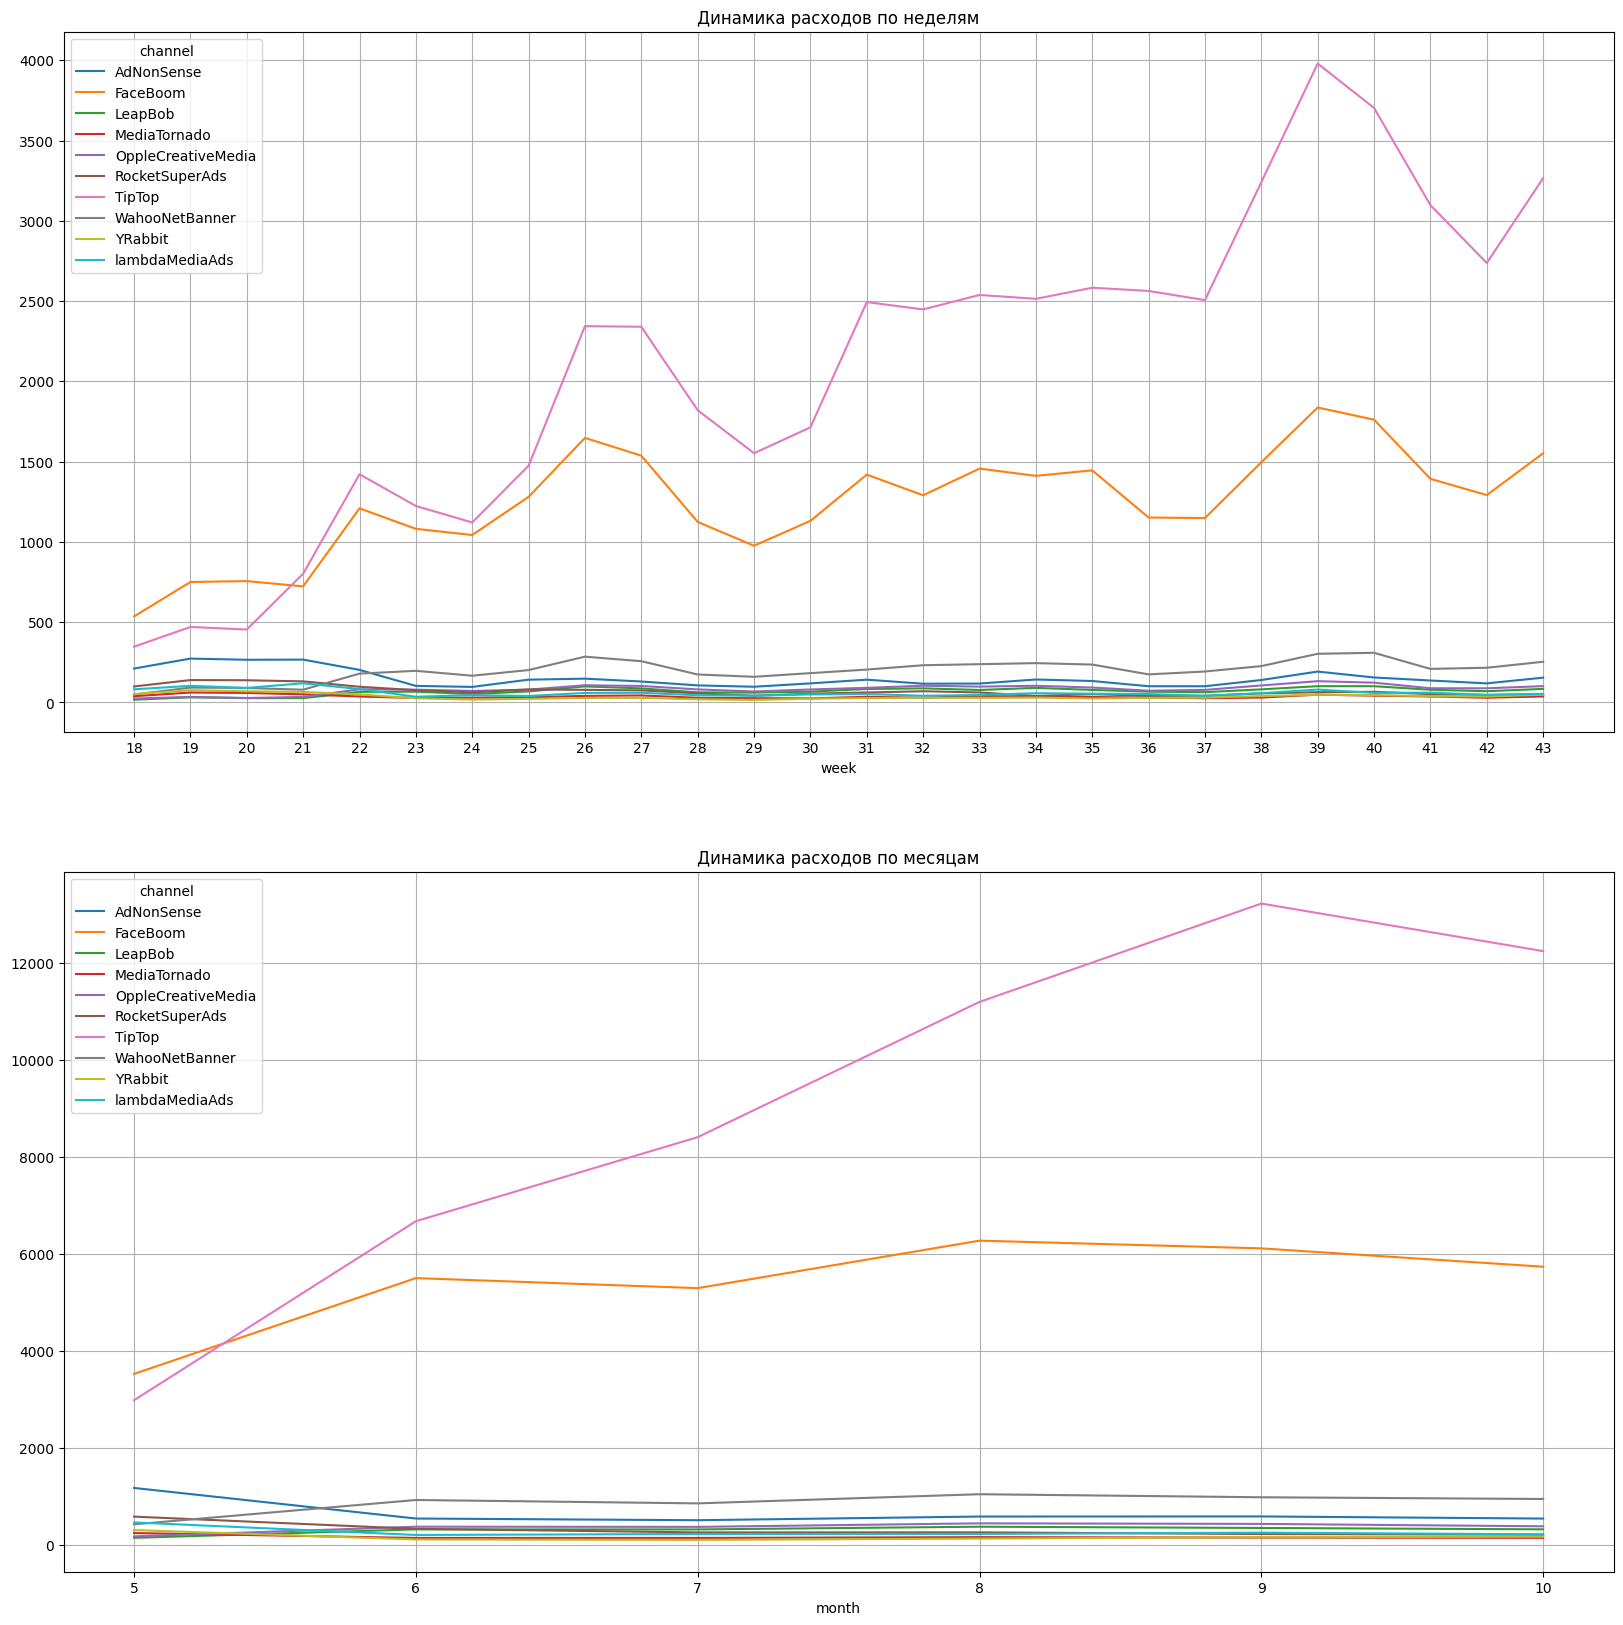

In [28]:
# построим графики с визуализацией динамики изменения расходов во времени по неделям и месяцам по каждому источнику

ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] = ad_costs['dt'].dt.month

plt.figure(figsize=(20, 20))

# задаем недельные расходы
ad_costs_week = ad_costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')

# строим динамику расходов по неделям
ad_costs_week.T.plot(grid=True, xticks=list(ad_costs_week.columns.values), ax=plt.subplot(2, 1, 1))
plt.title('Динамика расходов по неделям')

# задаем месячные расходы
ad_costs_month = ad_costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')

# строим динамику расходов по месяцам
ad_costs_month.T.plot(grid=True, xticks=list(ad_costs_month.columns.values), ax=plt.subplot(2, 1, 2))
plt.title('Динамика расходов по месяцам')
plt.show()

**Вывод:** Согласно полученным графикам видим, что больше всего расходы приходятся на каналы привлечения - TipTop и FaceBoom и составляют соответственно 4000 у.е. и 1800 у.е.. Пик расходов у обоих каналов приходится на 39 неделю. Остальные каналы на графиках слились в одну линию, расходы на них незначительны.

In [29]:
# рассчитаем САС на одного пользователя для всего проекта без органического привлечения
cac = profiles.query('channel != "organic"')[['user_id', 'acquisition_cost']] \
              .drop_duplicates().agg({'acquisition_cost':'mean'})
cac

acquisition_cost    1.127481
dtype: float64

In [30]:
# рассчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя 
# профили пользователей

cac = profiles.query('channel != "organic"').pivot_table(index='channel', values='acquisition_cost', aggfunc='mean') \
                      .sort_values(by='acquisition_cost', ascending=False) \
                      .rename(columns={'acquisition_cost':'cac'}) \
                      .reset_index().style.background_gradient(sns.light_palette("brown", as_cmap=True))

cac

,channel,cac
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


**Вывод:** Видим, что дороже всего обходится привлечение на одного клиента через TipTop (Cac=2,8), FaceBoom (Сас=1,1) и AdNonSense (Сас=1). По сравнению с другими каналами - это затраты в разы больше.

## Окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


In [31]:
# зададим горизонт и момент анализа, уберем органических пользователей, т.к. они могут исказить наш дальнейший анализ
profiles = profiles.query('channel != "organic"') 
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

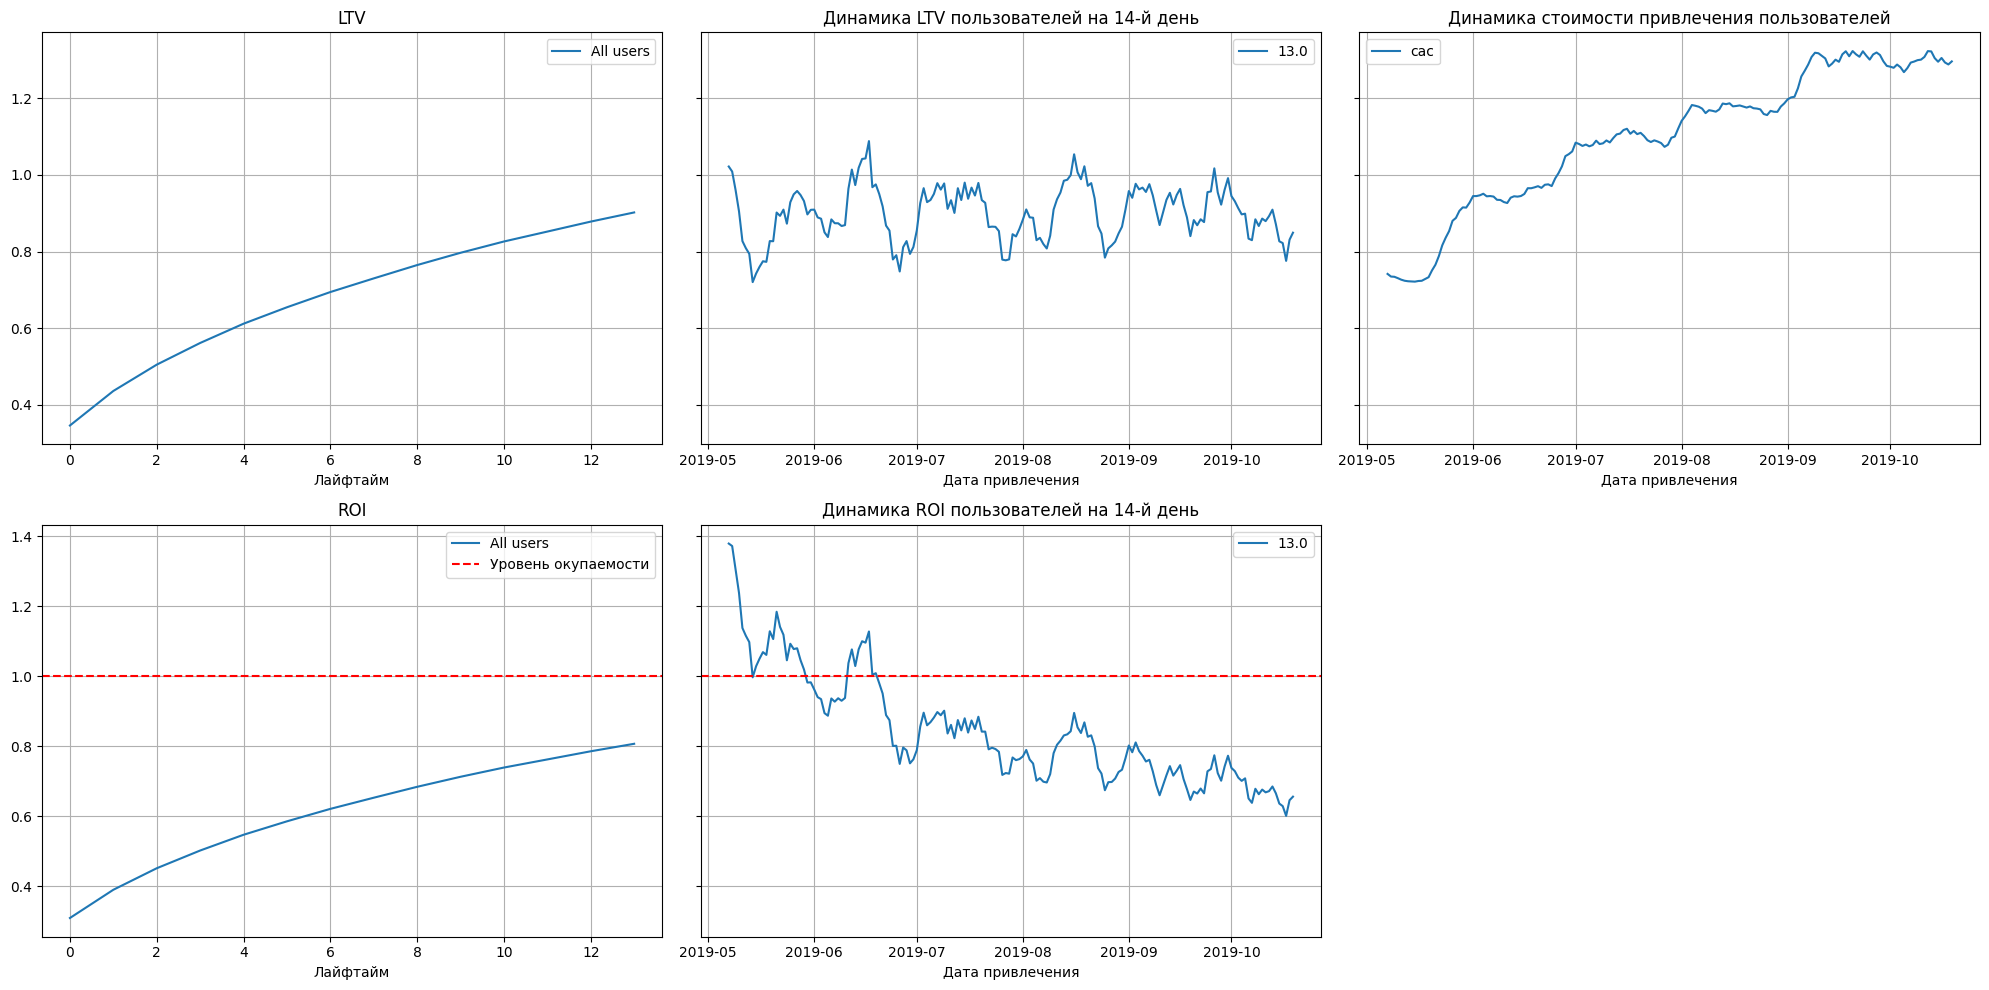

In [32]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( profiles, orders, observation_date, 
                                                                      horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** Видим, что прибыль с каждого клиента на протяжении всего лайфтайма растет и на 14 день равна 0,9. С точки зрения окупаемости - окупаемость пользователей к концу второй недели составляет всего лишь 80%. Показатель стоимости привлечения пользователей Сас на протяжении всего периода растет, а показатель Roi cтабильно падает вниз -  с июня месяца привлеченные пользователи не окупаются. Самый низкий Roi равен 60%.

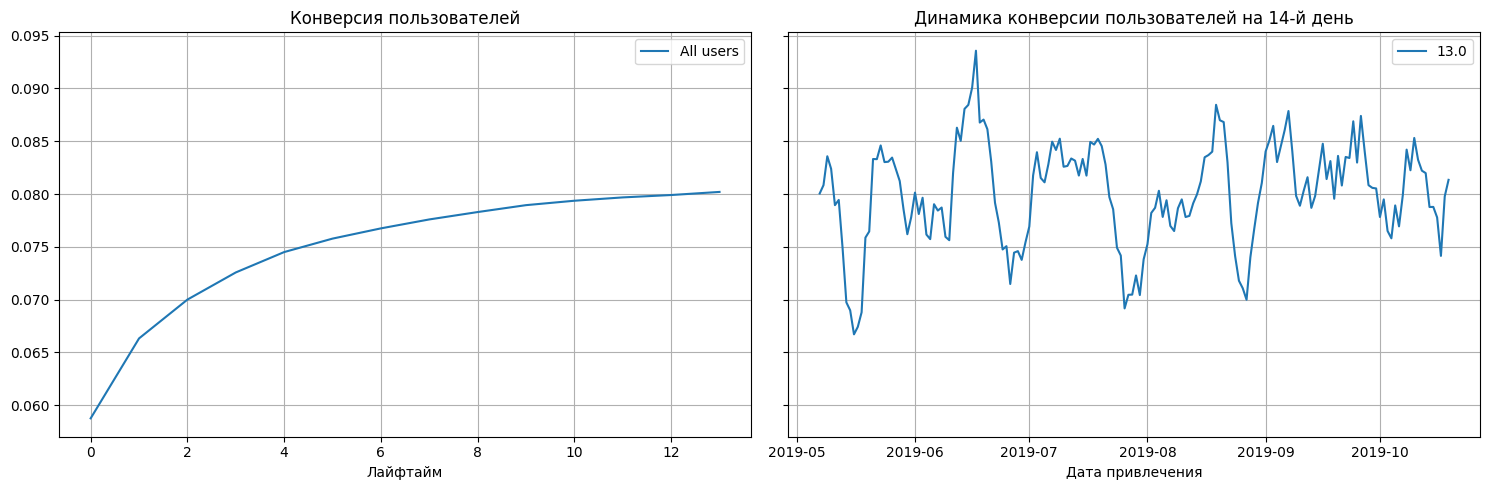

In [33]:
# проверим конверсию пользователей и динамику её изменения, то же самое с удержанием пользователей. 
# построим графики конверсии и удержания

conversion_raw, conversion_grouped, conversion_history = get_conversion( profiles, orders, observation_date, 
                                                                        horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

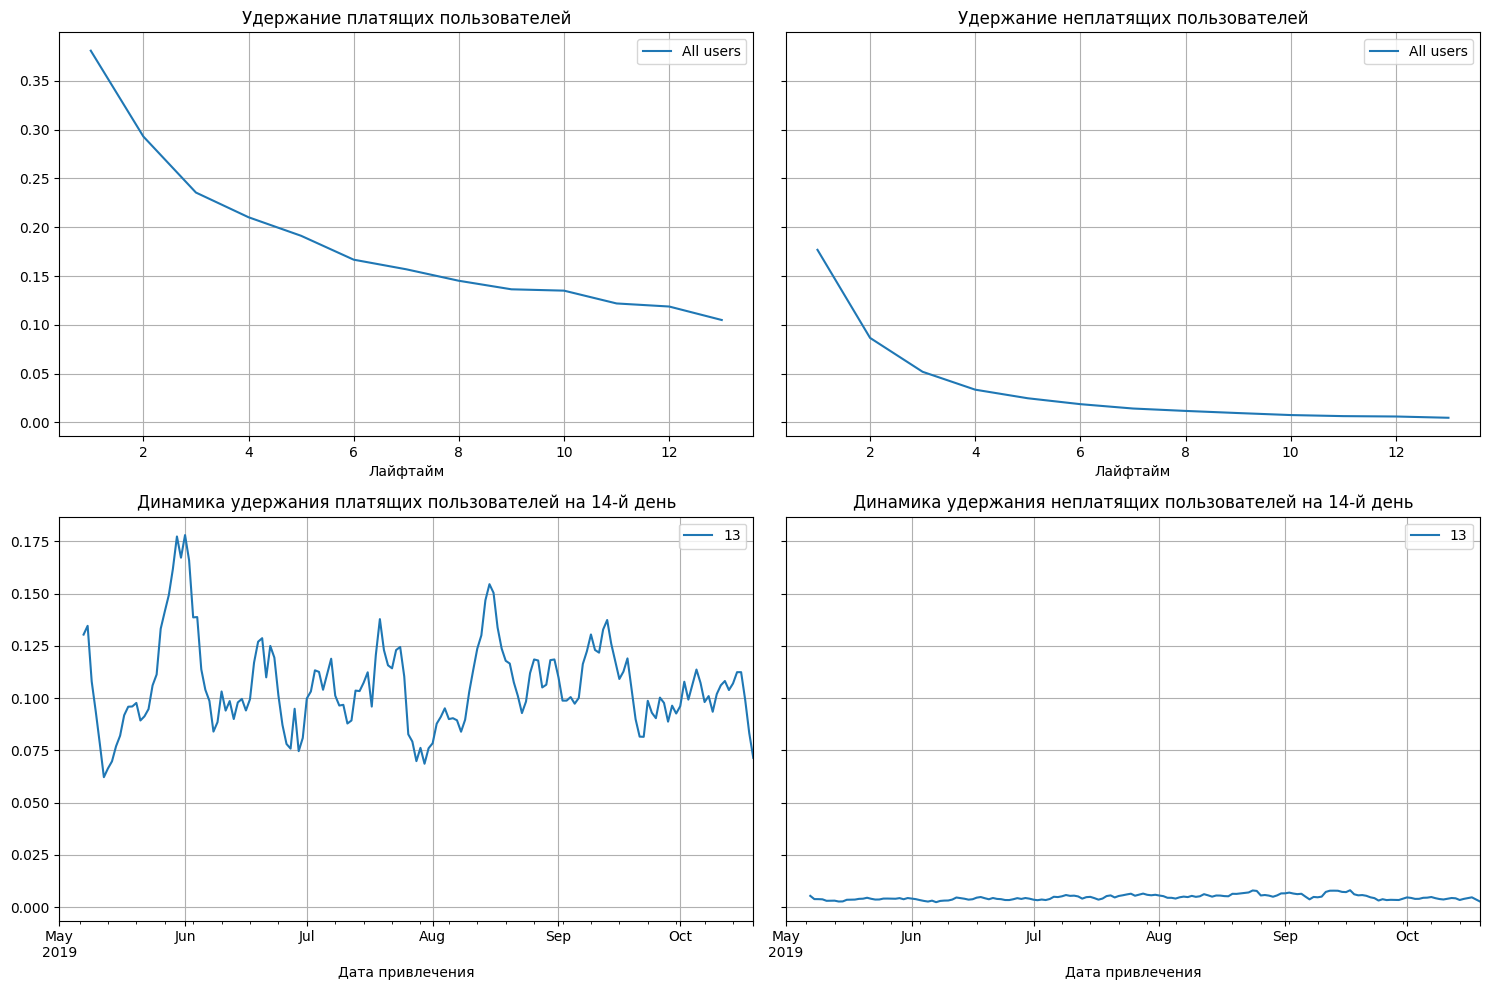

In [34]:
retention_raw, retention_grouped, retention_history = get_retention( profiles, visits, observation_date, 
                                                                    horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Видим, что конверсия хорошо растет до 6 дня жизни, далее идет подъем, но уже не таким быстрым темпом. Удержание платящих пользователей на первый день жизни составляет 37%, концу второй недели - 10%.  По динамике удержания мы видим, что в конце второй недели после привлечения остается около 7% пользователей. Максимально удержание на 14 день наблюдалось июне - 17,5%, минимальное в мае - 6%. Неплатящие пользователи не задерживаются надолго.

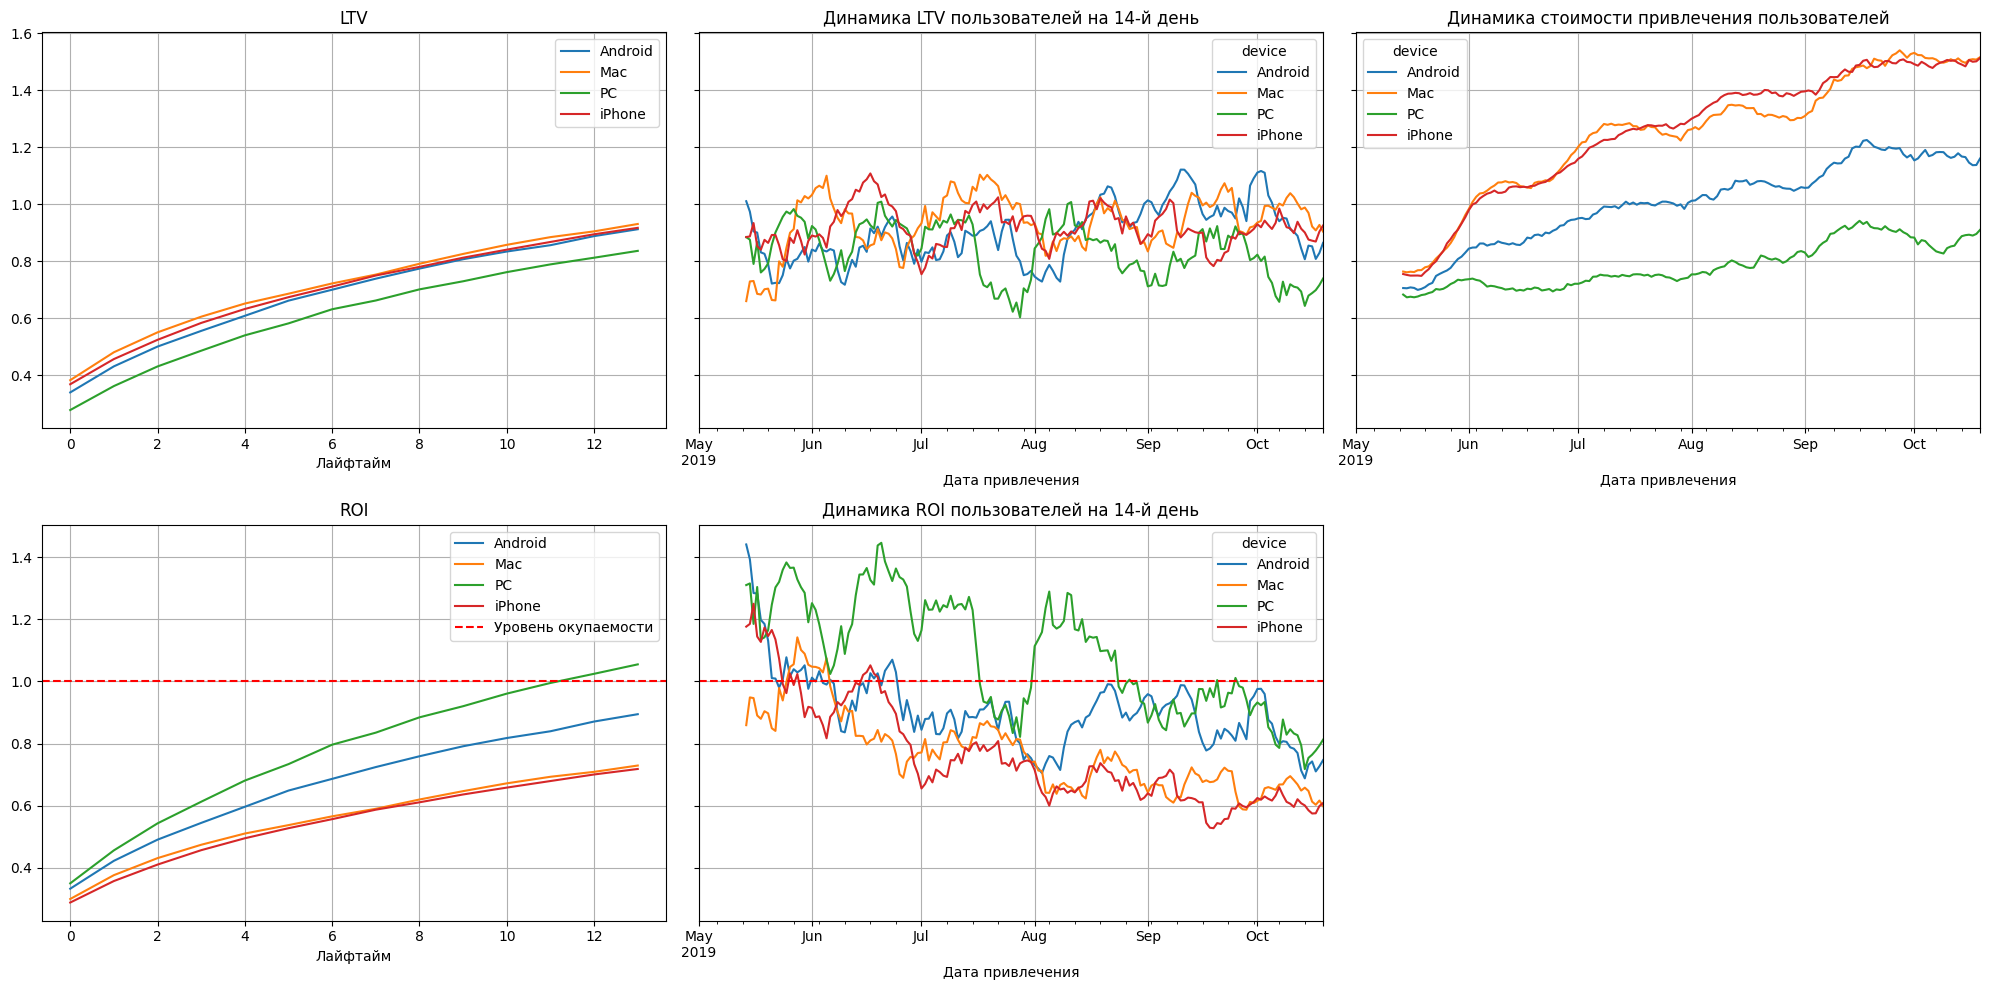

In [35]:
# проанализируем окупаемость рекламы с разбивкой по устройствам, построим графики LTV и ROI, а 
# также графики динамики LTV, CAC и ROI
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, 
                                                                      horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


**Вывод:** LTV пользователей всех устройств стабильно растет, самый низкий LTV у PC, но при этом окупаемость у этой категории выше всех. Стоимость привлечения пользователей Mac и Iphone намного выше, чем у других устройств.Согласно гарфика динамики Roi видим, чтоб период примерно с мая по июль, когда затраты на пользователей всех устройств окупались, затем началось постепенное падение. Также пользователи PC больше всего по времени окупались, по сранению с другими устройствами. Хуже всего окупаются пользователи Mac и Iphone.

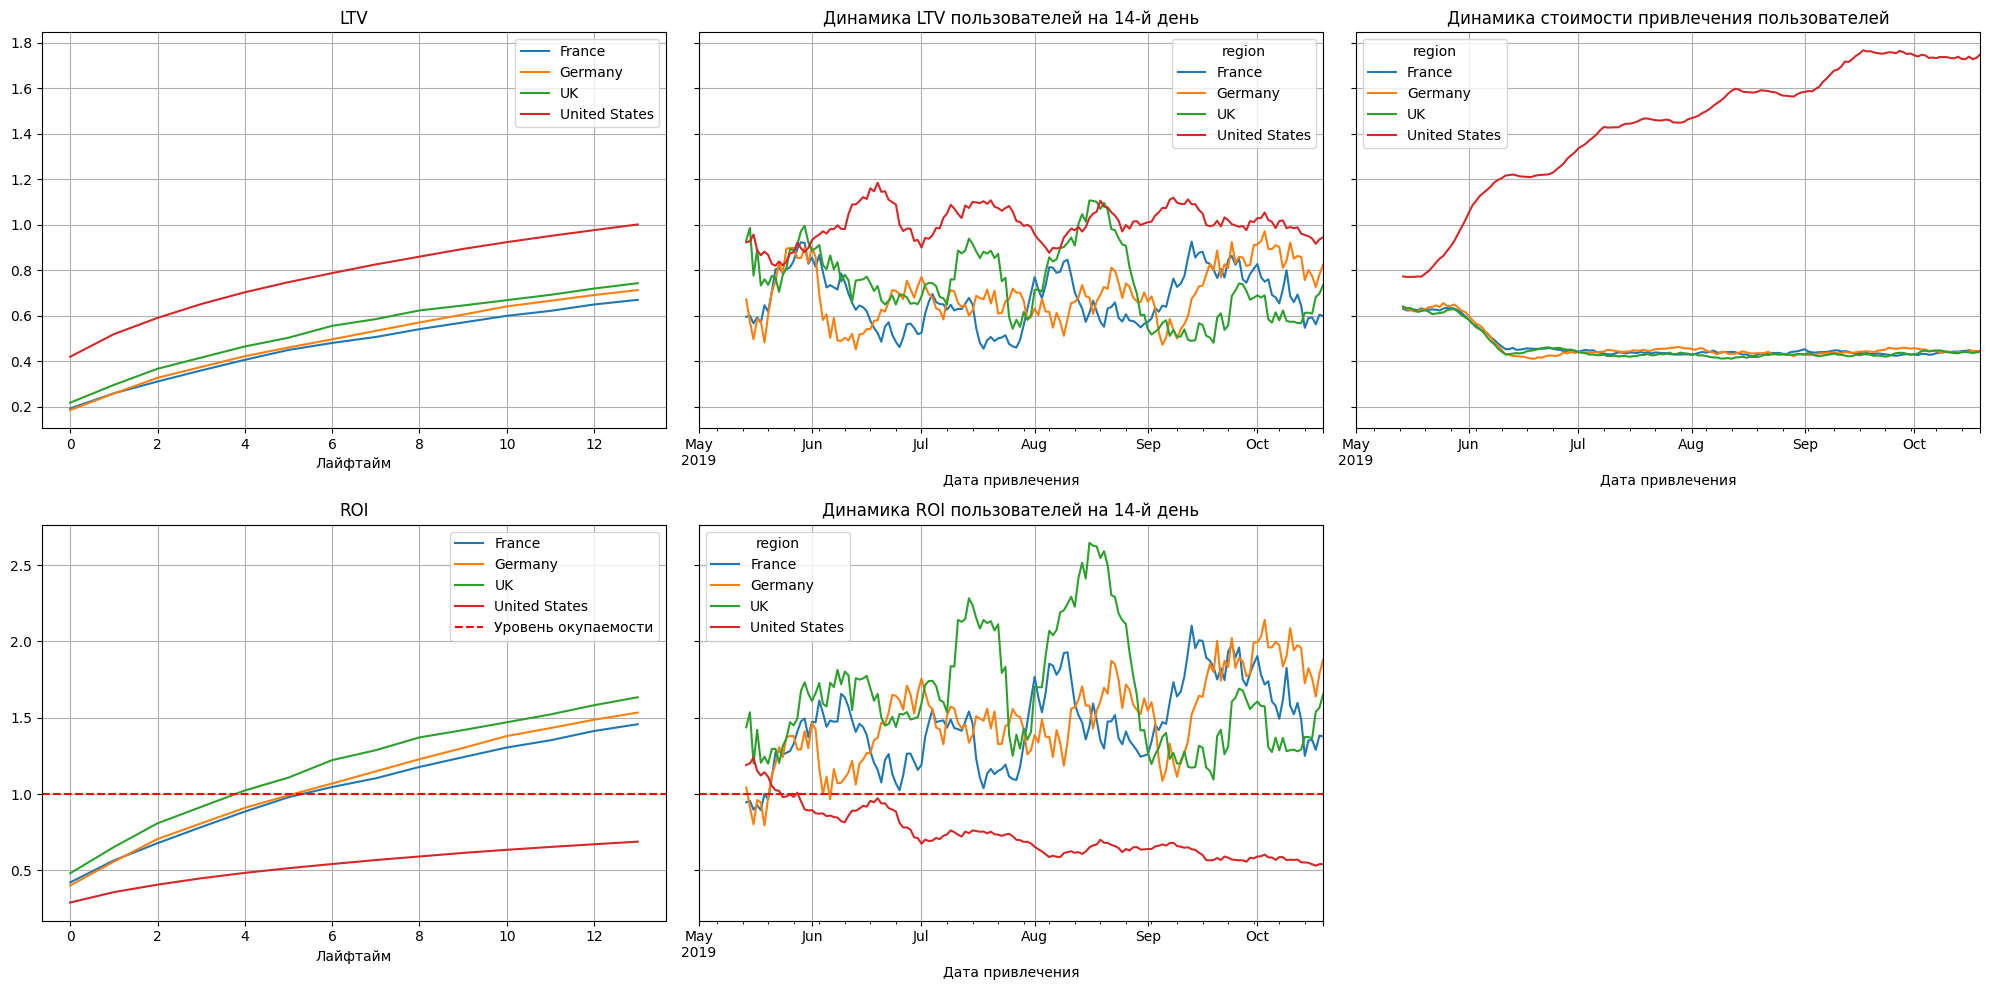

In [36]:
# проанализируем окупаемость рекламы с разбивкой по странам, построим графики LTV и ROI, графики динамики LTV, CAC, ROI
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( profiles, orders, observation_date, 
                                                                      horizon_days, dimensions=dimensions)

plot_ltv_roi( ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:** Видим, что LTV USA выше остальных, но приэтом затраты на пользователей этой страны совсем не окупаются. Это происходит из-за постоянно увеличивающегося Сас. Также можно заметить, что Roi начал падать ближе к июню - в это же время затраты начали возрастать. Лучше всего окупается Англия и Франция.

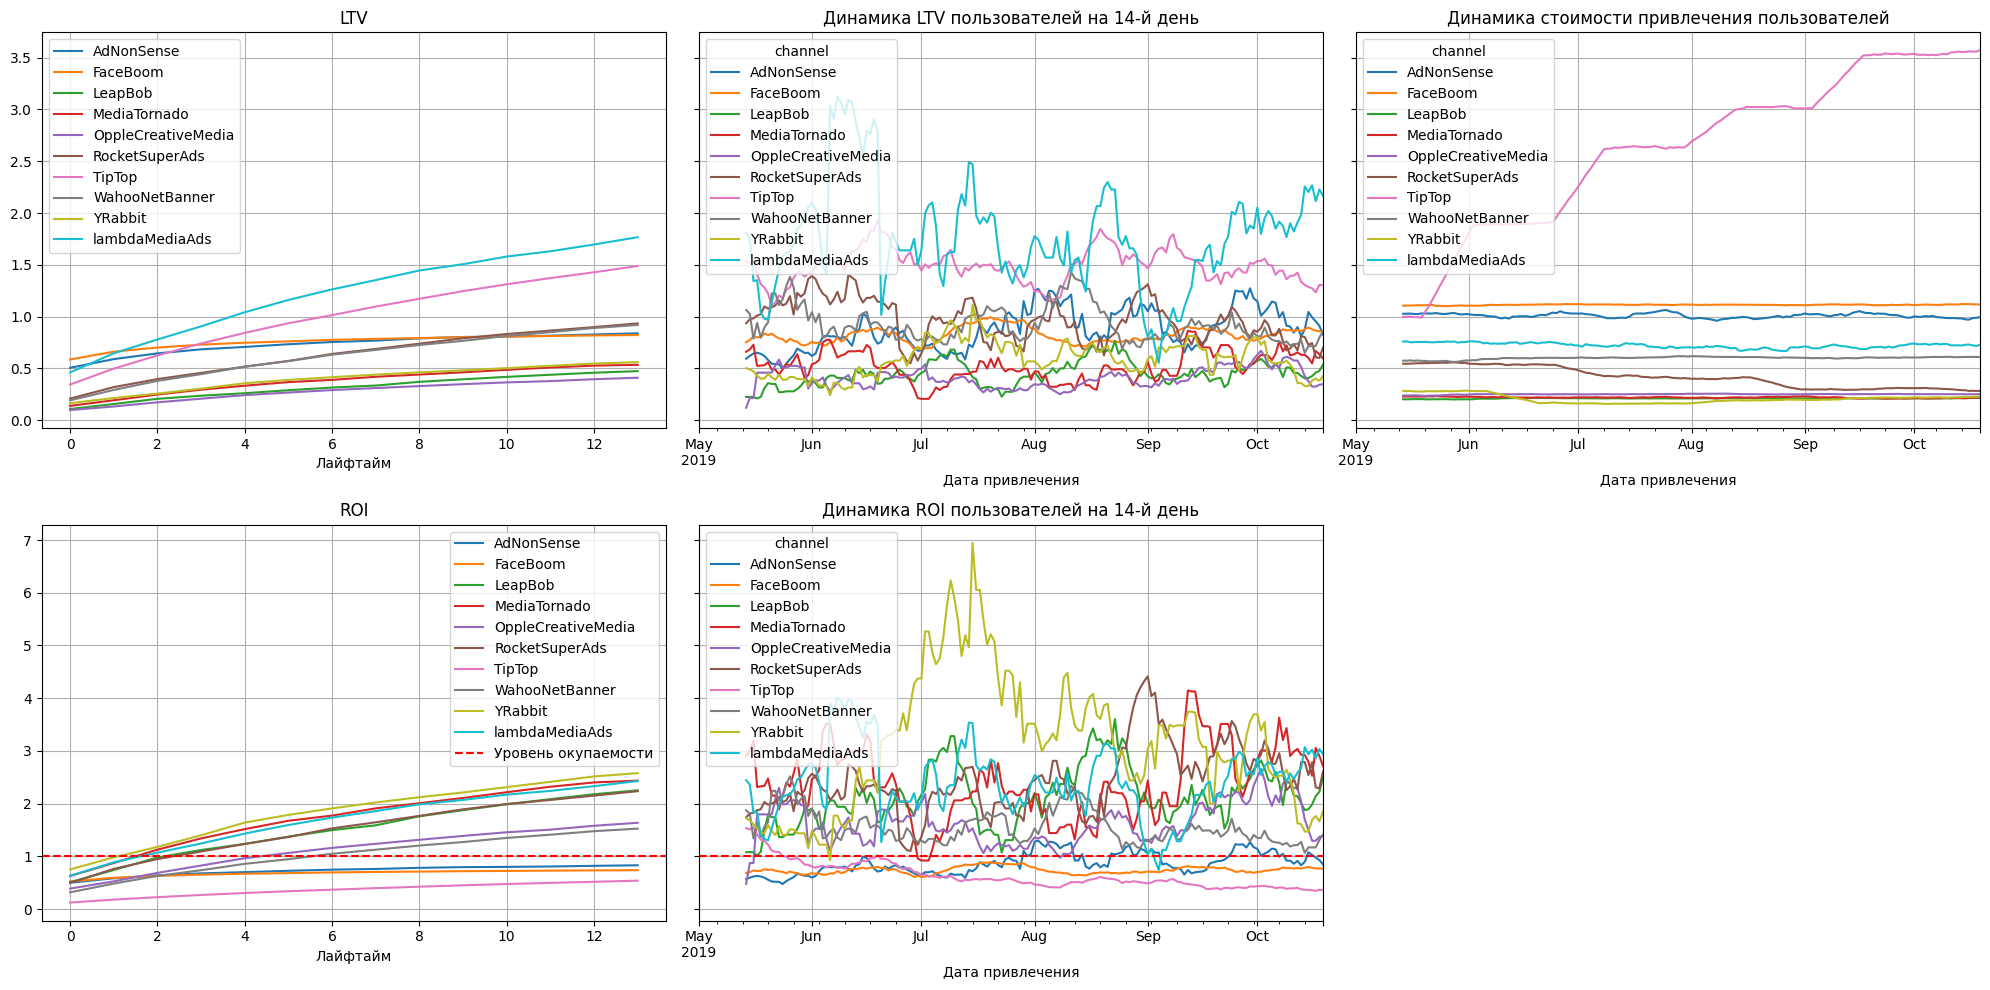

In [37]:
# проанализируем окупаемость рекламы с разбивкой по рекламным каналам, построим графики LTV и ROI, графики 
# динамики LTV, CAC и ROI
# проанализируем окупаемость рекламы с разбивкой по странам, построим графики LTV и ROI, графики динамики LTV, CAC, ROI
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( profiles, orders, observation_date, 
                                                                      horizon_days, dimensions=dimensions)

plot_ltv_roi( ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:** Видим, что Ltv LambdaVediaAds и TipTop немного выше, чем у остальных каналов. Наблюдается высокий Сас у TipTo, вследствии чего не окупаемость этого канала и в том числе у AdNonSence и FaceBoom. Остальные каналы показывают высокую рентабильность. 

**Общий вывод по пункту:**
- Реклама хорошо окупается у пользователей PC стран Франции, Германии и Англии через каналы привлечения - lambdaMediaAds, WahooNetBanner, RocketSuperAds, OppleCreativeMedia, YRabbit, MediaTornado и LeapBob.
- Уровень затрат на рекламу для пользователей Mac и Iphone, проживающих в США, привлеченных благодаря TipTop необоснованно высокий и совсем не окупается, считаю что в такую рекламу не стоит вкладывать средства или обдумать новую стратегию продаж и привлечения новых пользователей этих категорий.
- Рекламному отделу могу предложить больше вкладываться в рекламу пользователей РС, все-таки окупаемость рекламы стабильна для данной категории, в следствии к примеру уменьшения затрат на Mac и Iphone, которые показала низкую окупаемость.

## Выводы

- В ходе анализа данных могу выделить причину не эффективности привлечения пользователей - как неправильное распределение средств на рекламу, в следствии чего происходит низкая окупаемость затрат. 
- Как я писала выше все-таки рекоменую уменьшить расходы на рекламу Mac и Iphone пользователей, проживающих в США. 
- Также стоить отметить, что органически привлеченных пользователей макимальное количество в том числе платящих, поэтому рекламному отделу может быть предложенно допустим больше вкладываться в поисковое продвижение: чем выше ресурс в выдаче, тем больше людей его видят и посещают. Такой результат привлечения рассчитан на долгосрочный и стабильный эффект: посещаемость долго сохраняется даже после прекращения работ по продвижению, трафик не падает резко.

Спасибо за внимание!)